# Support Vector Regression

Thanks to ML team, I use the linear regression and existing SVR code as template

Part of the code is from https://towardsdatascience.com/unlocking-the-true-power-of-support-vector-regression-847fd123a4a0



In [1]:
import pandas as pd
import financialanalysis as fa # 'pip install financialanalysis' in terminal if you don't have it
import numpy as np

df = pd.read_csv('./TSLA.csv')

#categorical -> float
df.Date = pd.to_datetime(df.Date)
df.Date = fa.datetimeToFloatyear(df.Date)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010.490411,3.800,5.000,3.508,4.778,4.778,93831500
1,2010.493151,5.158,6.084,4.660,4.766,4.766,85935500
2,2010.495890,5.000,5.184,4.054,4.392,4.392,41094000
3,2010.498630,4.600,4.620,3.742,3.840,3.840,25699000
4,2010.509589,4.000,4.000,3.166,3.222,3.222,34334500


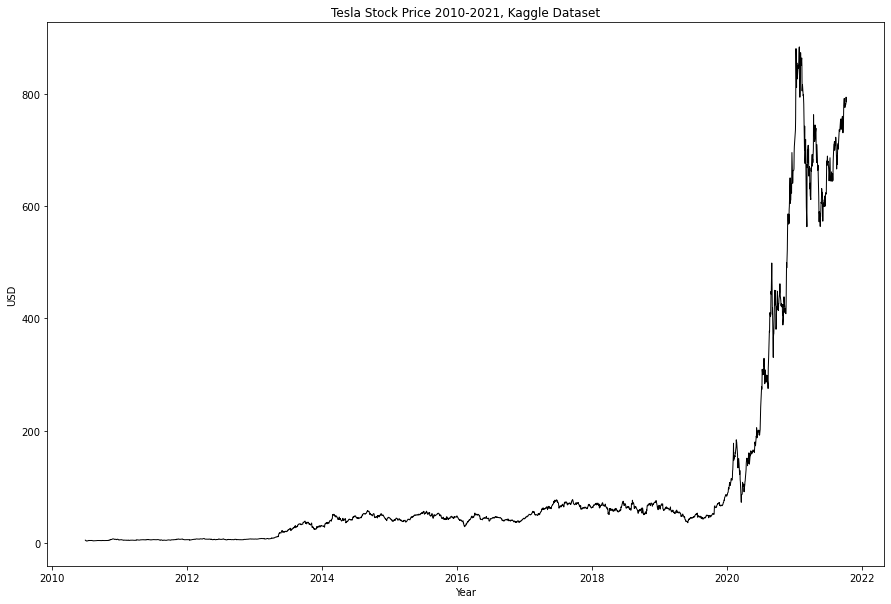

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plt.plot(df.Date, df.Close, color='black',linewidth=1)
plt.xlabel('Year')
plt.ylabel('USD')
plt.title('Tesla Stock Price 2010-2021, Kaggle Dataset')
plt.show()

<AxesSubplot:>

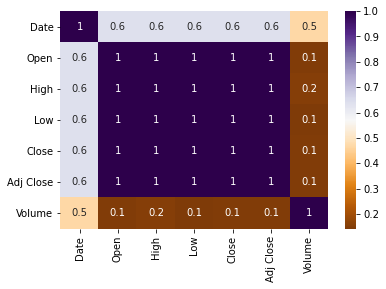

In [3]:
import seaborn as sns

sns.heatmap(df.corr(), annot = True, fmt='.1g', cmap= 'PuOr')

In [4]:
#finding & removing outliers
print(df.shape)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

df = df[~((df < (Q1-1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df.shape)

(2841, 7)
Date         5.632877e+00
Open         5.470000e+01
High         5.546200e+01
Low          5.371600e+01
Close        5.492800e+01
Adj Close    5.492800e+01
Volume       2.766650e+07
dtype: float64
(2328, 7)


## Pairplot



<class 'pandas.core.frame.DataFrame'>
Int64Index: 2328 entries, 2 to 2472
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2328 non-null   float64
 1   Open       2328 non-null   float64
 2   High       2328 non-null   float64
 3   Low        2328 non-null   float64
 4   Close      2328 non-null   float64
 5   Adj Close  2328 non-null   float64
 6   Volume     2328 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 145.5 KB
None


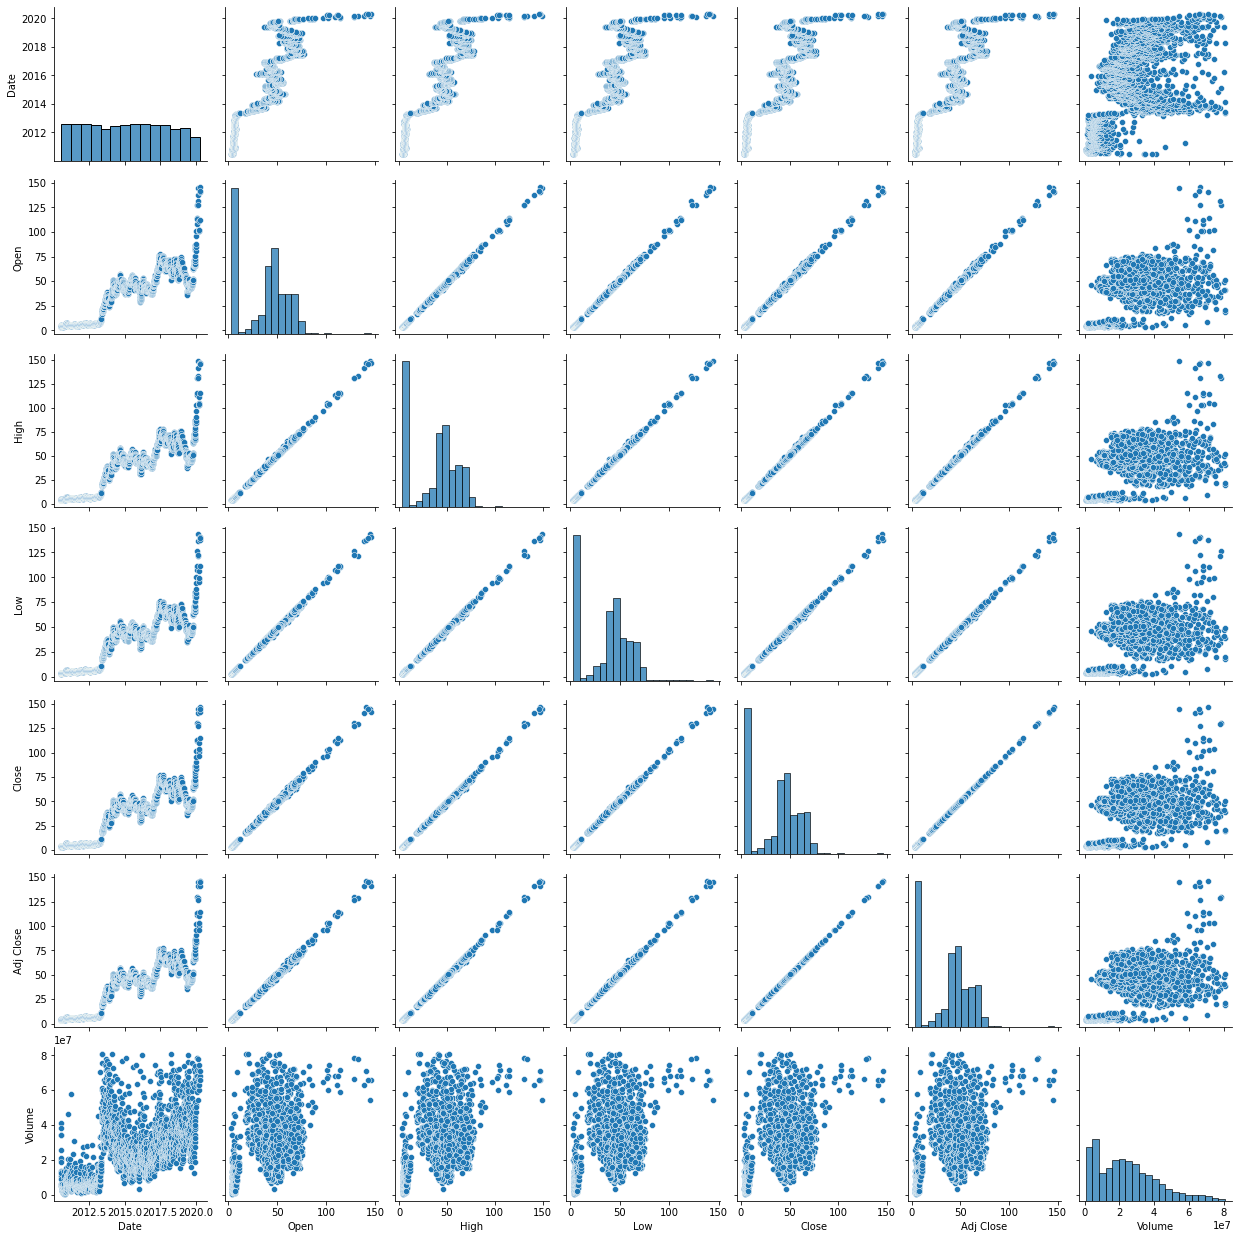

In [5]:
import seaborn as sns
print(df.info())
sns.pairplot(data=df)

In [6]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=21)

# Need to be sorted for polynomial regression to work properly
train = train.sort_values(by=['Date'])
test = test.sort_values(by=['Date'])
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2,2010.495890,5.000,5.184,4.054,4.392,4.392,41094000
3,2010.498630,4.600,4.620,3.742,3.840,3.840,25699000
4,2010.509589,4.000,4.000,3.166,3.222,3.222,34334500
5,2010.512329,3.280,3.326,2.996,3.160,3.160,34608500
6,2010.515068,3.228,3.504,3.114,3.492,3.492,38557000


#### Preparing Data

In [7]:
Xtrain = train.drop(columns=['Close','Adj Close'])
Ytrain = train['Close']
Xtest = test.drop(columns=['Close','Adj Close'])
Ytest = test['Close']

In [8]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
sc_y = StandardScaler()

Xtrain = sc_X.fit_transform(Xtrain)
Xtest = sc_X.fit_transform(Xtest)
Ytrain = sc_y.fit_transform(Ytrain.values.reshape(-1, 1))
Ytest = sc_y.fit_transform(Ytest.values.reshape(-1, 1))


Hyperparameter tuning

In [9]:
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

parameters = {'C':[900, 1000,1100],'gamma': [1e-3, 1e-4, 0.01, 1e-5],'epsilon':[0.14,0.1]}
svr = SVR(kernel = 'rbf')
clf = GridSearchCV(svr, parameters)
clf.fit(Xtrain,Ytrain.ravel())
clf.best_params_

{'C': 1100, 'epsilon': 0.1, 'gamma': 1e-05}

In [10]:
clf.best_estimator_

SVR(C=1100, gamma=1e-05)

Create the model and train it

In [11]:
regressor = SVR(kernel = 'rbf', C=1000, gamma=0.001)
regressor.fit(Xtrain, Ytrain.ravel())

y_pred = regressor.predict(Xtest)

show result

MSE:  0.0036539412839239104


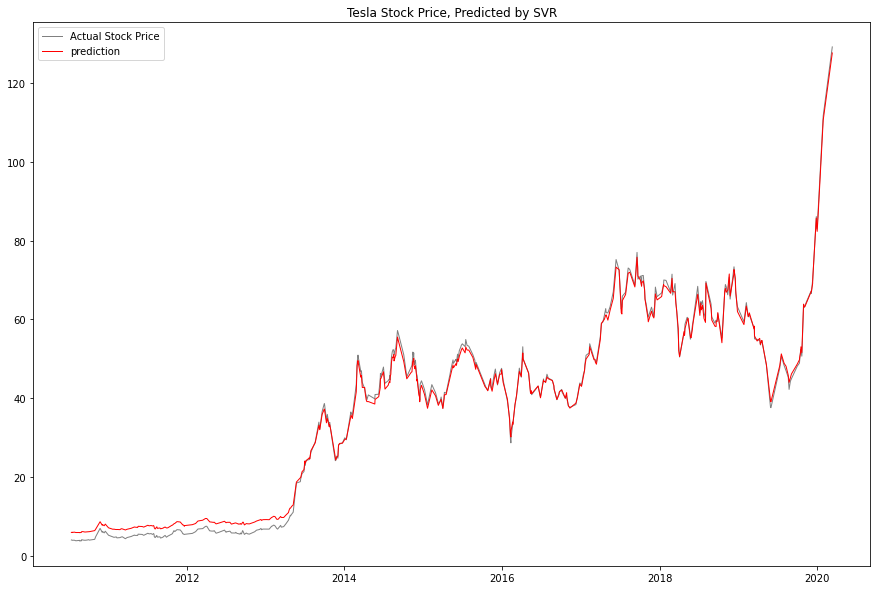

In [12]:
MSE = metrics.mean_squared_error(Ytest, y_pred)
print('MSE: ',MSE)

y_test = sc_y.inverse_transform(Ytest)
X_test = test['Date']
y_pred = sc_y.inverse_transform(y_pred.reshape(-1,1))

plt.figure(figsize=(15,10))
plt.title('Tesla Stock Price, Predicted by SVR')
plt.plot(X_test, y_test, color='gray', linewidth=1)
plt.plot(X_test, y_pred, color='red', linewidth=1)
#X_test
plt.legend(['Actual Stock Price','prediction'])
plt.show()